In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('final_dataset.csv', encoding = 'unicode_escape')

In [3]:
# Melt the dataframe to have a long-form dataframe suitable for seaborn
df_melted = df.melt(id_vars=['State Name'], value_vars=[
    'Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 
    'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses', 
    'Construction Equipment Vehicle', 'Other'
], var_name='Vehicle Type', value_name='Sales')

In [11]:
df_melted.describe()

Sales
count     288.000000
mean     3355.427083
std     18178.295977
min         0.000000
25%         0.000000
50%         7.500000
75%       122.500000
max    257159.000000

In [4]:
df_melted.head(10)

State Name Vehicle Type  Sales
0  Andaman and Nicobar Island  Two Wheeler      1
1           Arunachal Pradesh  Two Wheeler     14
2                       Assam  Two Wheeler    721
3                       Bihar  Two Wheeler   5003
4                  Chandigarh  Two Wheeler    298
5                Chhattisgarh  Two Wheeler   6424
6                       Delhi  Two Wheeler  14730
7                         Goa  Two Wheeler   1314
8                     Gujarat  Two Wheeler  13662
9                     Haryana  Two Wheeler   7777

In [13]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State Name    288 non-null    object
 1   Vehicle Type  288 non-null    object
 2   Sales         288 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.9+ KB


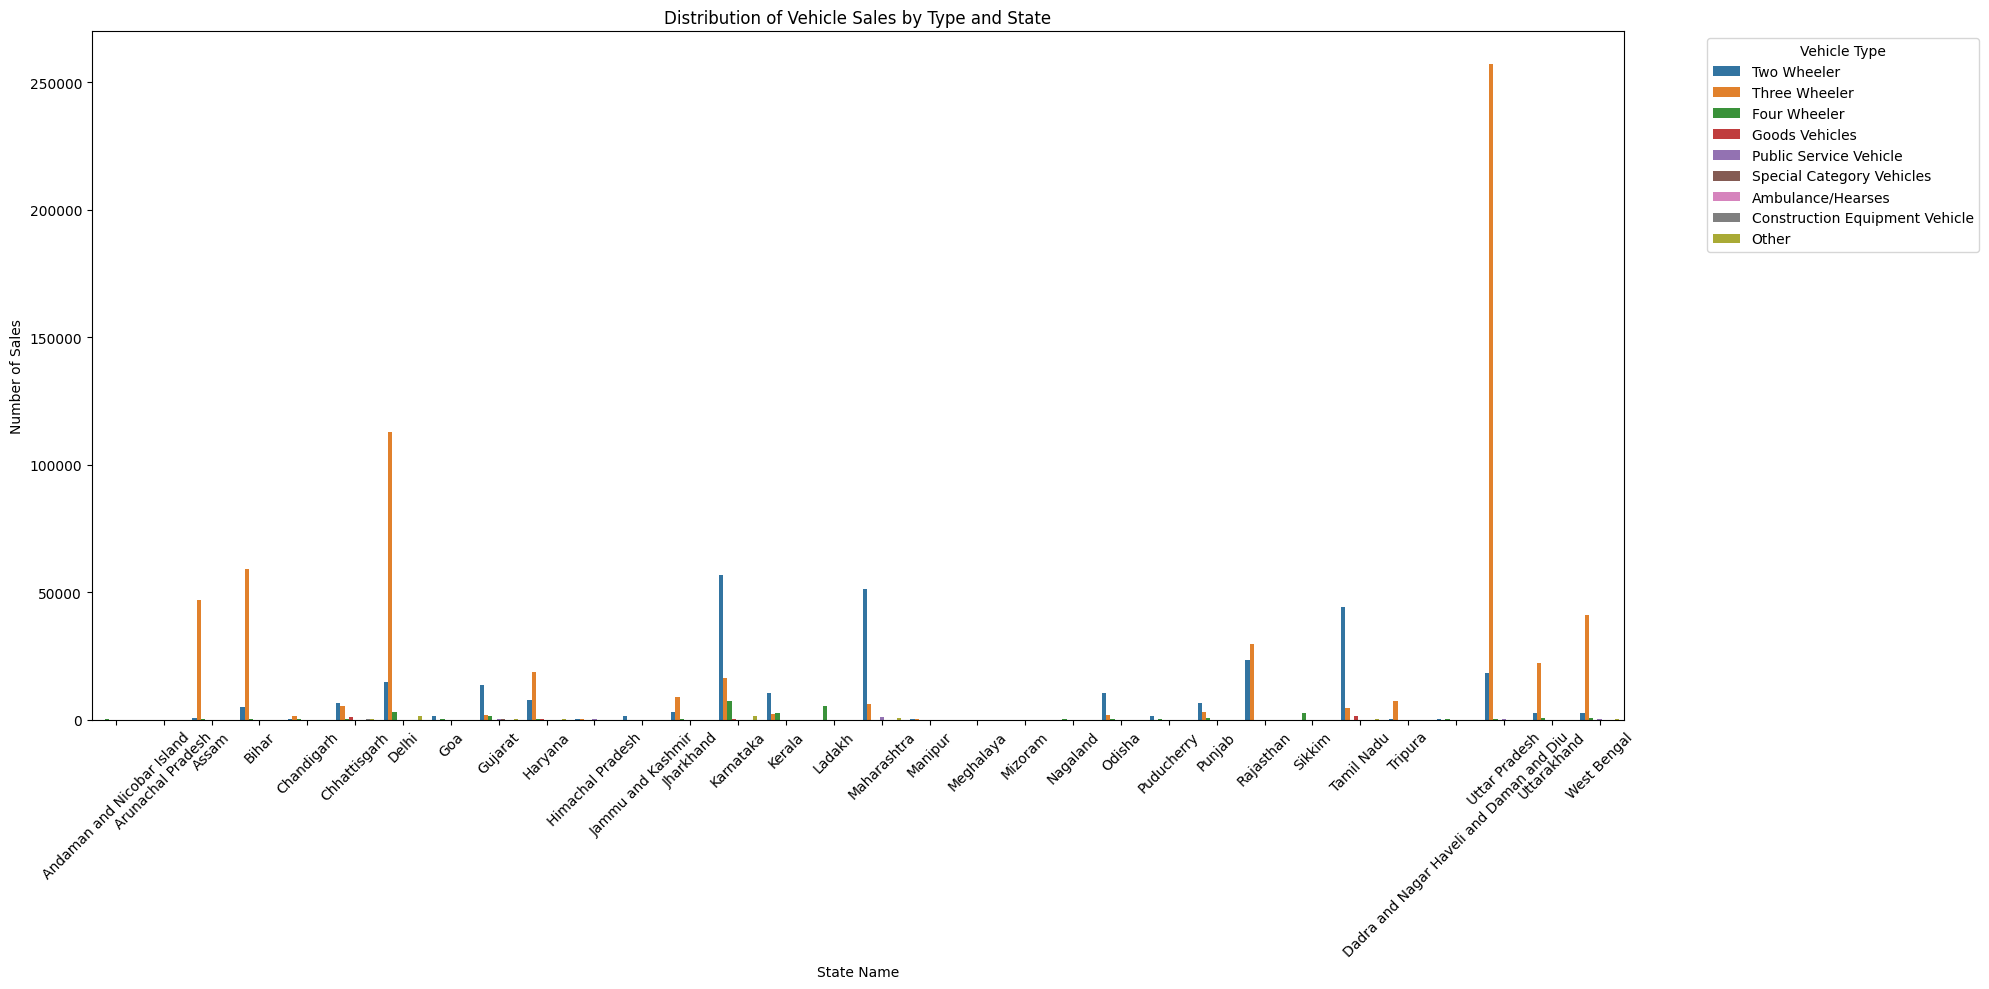

In [4]:
# Plot the distribution of sales among different vehicle types for each state
plt.figure(figsize=(20, 10))
sns.barplot(data=df_melted, x='State Name', y='Sales', hue='Vehicle Type')
plt.title('Distribution of Vehicle Sales by Type and State')
plt.xlabel('State Name')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Top 5 states with highest overall sales

In [5]:
top_5_states = df.nlargest(5, 'Grand Total')

In [14]:
top_5_states.head()

Unnamed: 0     State Name  Two Wheeler  Three Wheeler  Four Wheeler  \
29          29  Uttar Pradesh        18295         257159           368   
6            6          Delhi        14730         112831          3051   
13          13      Karnataka        56737          16478          7212   
3            3          Bihar         5003          59079           114   
16          16    Maharashtra        51149           6155             2   

    Goods Vehicles  Public Service Vehicle  Special Category Vehicles  \
29              53                     327                          2   
6               49                      39                          0   
13             153                      44                          1   
3               11                      26                          0   
16              30                     851                         26   

    Ambulance/Hearses  Construction Equipment Vehicle  Other  Grand Total  \
29                  0                               0     13       276217   
6                   0                               0   1602       132302   
13                  1                               0   1420        82046   
3                   0                               0      8        64241   
16                  1                               0    601        58815   

    total-charging-stations  
29                     87.0  
6                     179.0  
13                    134.0  
3                       9.0  
16                    265.0

In [6]:
df_melted_top_5 = top_5_states.melt(id_vars=['State Name'], value_vars=[
    'Two Wheeler', 'Three Wheeler', 'Four Wheeler', 'Goods Vehicles', 
    'Public Service Vehicle', 'Special Category Vehicles', 'Ambulance/Hearses', 
    'Construction Equipment Vehicle', 'Other'
], var_name='Vehicle Type', value_name='Sales')

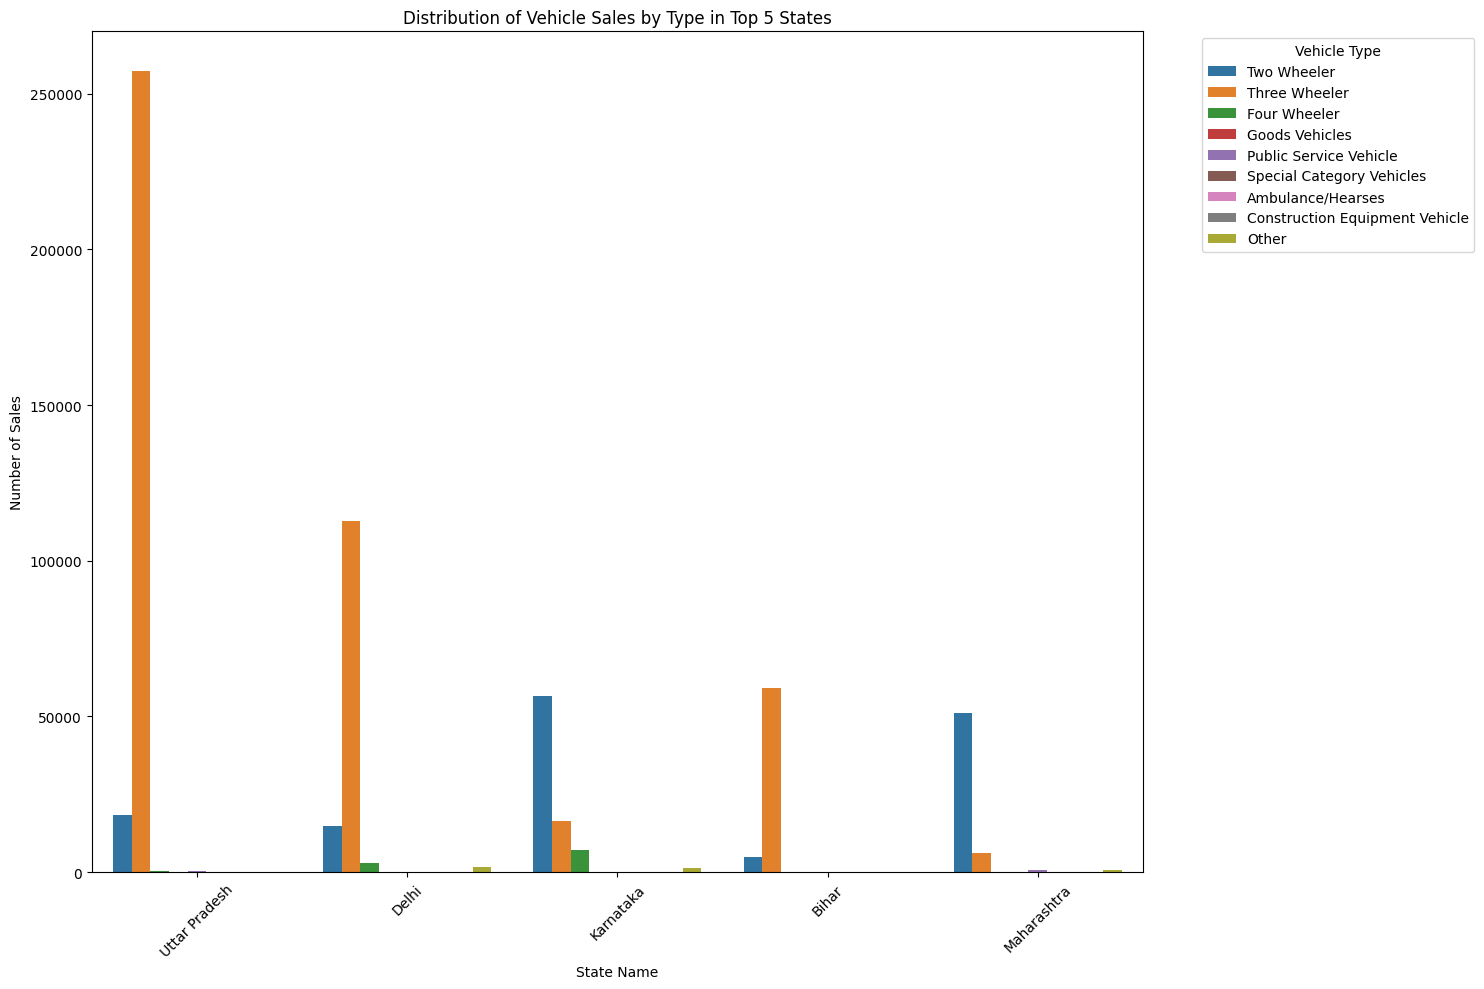

In [7]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_melted_top_5, x='State Name', y='Sales', hue='Vehicle Type')
plt.title('Distribution of Vehicle Sales by Type in Top 5 States')
plt.xlabel('State Name')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

It can be concluded from above that UP, Delhi, Karnataka, Bihar and Maharashtra have highest number of vehicle sales. And Out of these Karnataka And Maharashtra have highest number of 2 wheeler sales.

In [5]:
check = df_melted.groupby('State Name')
check.head()

State Name            Vehicle Type  Sales
0                  Andaman and Nicobar Island             Two Wheeler      1
1                           Arunachal Pradesh             Two Wheeler     14
2                                       Assam             Two Wheeler    721
3                                       Bihar             Two Wheeler   5003
4                                  Chandigarh             Two Wheeler    298
..                                        ...                     ...    ...
155                                   Tripura  Public Service Vehicle      0
156  Dadra and Nagar Haveli and Daman and Diu  Public Service Vehicle     10
157                             Uttar Pradesh  Public Service Vehicle    327
158                               Uttarakhand  Public Service Vehicle     10
159                               West Bengal  Public Service Vehicle     97

[160 rows x 3 columns]

## Vehicel Type with the highest and lowest sales

In [6]:
# Function to find the vehicle type with highest and lowest sales for each state
def highest_lowest_sales(df):
    max_sales = df.loc[df['Sales'].idxmax()]
    min_sales = df.loc[df['Sales'].idxmin()]
    return pd.Series({
        'Highest Sales Vehicle Type': max_sales['Vehicle Type'],
        'Highest Sales': max_sales['Sales'],
        'Lowest Sales Vehicle Type': min_sales['Vehicle Type'],
        'Lowest Sales': min_sales['Sales']
    })

In [ ]:
# Apply the function to each group (state)
result = df_melted.groupby('State Name', group_keys=False).apply(highest_lowest_sales).reset_index()

In [9]:
print(result)

                                  State Name Highest Sales Vehicle Type  \
0                 Andaman and Nicobar Island               Four Wheeler   
1                          Arunachal Pradesh                Two Wheeler   
2                                      Assam              Three Wheeler   
3                                      Bihar              Three Wheeler   
4                                 Chandigarh              Three Wheeler   
5                               Chhattisgarh                Two Wheeler   
6   Dadra and Nagar Haveli and Daman and Diu               Four Wheeler   
7                                      Delhi              Three Wheeler   
8                                        Goa                Two Wheeler   
9                                    Gujarat                Two Wheeler   
10                                   Haryana              Three Wheeler   
11                          Himachal Pradesh                Two Wheeler   
12                       